# Régression Logistique

La régression logistique est un modèle de classification binaire utilisé pour estimer la probabilité qu'une observation appartienne à l'une des deux classes (par exemple, succès/échec, oui/non, 1/0). Elle repose sur la fonction logistique pour transformer une combinaison linéaire des variables explicatives en une probabilité comprise entre 0 et 1.

In [2]:
import pandas as pd

# Chargement des données (le fichier .csv est supposé disponible localement)
data = pd.read_csv('UCI_Credit_Card.csv')  # nom fictif du fichier
print(data.shape) 

(30000, 25)


In [3]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
# Regroupement des modalités rares avec une logique métier
data['EDUCATION'] = data['EDUCATION'].replace({5: 'Autres', 6: 'Autres', 0: 'Autres', 4: 'Autres'})

# Regroupement des statuts matrimoniaux
data['MARRIAGE'] = data['MARRIAGE'].replace({3: 'Autres', 0: 'Autres'})

# Regroupement des statuts de paiement
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    data[col] = data[col].replace({-2: 'Paiement à temps', -1: 'Paiement à temps', 0: 'Paiement à temps',
                                    1: 'Retard', 2: 'Retard',
                                    3: 'Retard', 4: 'Retard', 5: 'Retard',
                                    6: 'Retard', 7: 'Retard', 8: 'Retard'})

In [5]:
# Transformation des données
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

for col in categorical_columns:
    data[col] = data[col].astype('category')

In [6]:
# Liste des variables à transformer en qualitatives
qualitative_columns = categorical_columns

In [ ]:
# Diviser en train et test
df = data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des variables explicatives et cible
X = df.drop(columns='default.payment.next.month')
y = df['default.payment.next.month']

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de manière stratifiée
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y #stratify pour obtenir un échantillon représentatif sur la variable défaut
)

In [ ]:
# Prétraitement des données
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

# Identification automatique des colonnes catégorielles
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Convertir les colonnes catégoriques en type 'str' pour éviter les erreurs
X_train[cat_columns] = X_train[cat_columns].astype(str)
X_test[cat_columns] = X_test[cat_columns].astype(str)

# Transformer les variables catégorielles 
# discotisation des variables catégorielles
preprocessor = ColumnTransformer(  
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_columns)  # One-hot encoding pour les colonnes catégorielles
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchangées
)


In [13]:
# Transformer les variables catégorielles avec OneHotEncoder et garder les autres variables inchangées
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 6.000e+03, 6.000e+03,
        5.500e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.846e+03,
        1.936e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.600e+03, 1.600e+03,
        1.600e+03],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+03, 1.200e+03,
        1.000e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [14]:
# Récupérer les noms des nouvelles colonnes créées par OneHotEncoder
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)

# Fusionner avec les colonnes numériques originales
new_columns = list(onehot_columns) + list(X_train.select_dtypes(exclude=['object', 'category']).columns)

# Afficher les nouveaux noms de colonnes
new_columns


['SEX_2',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_Autres',
 'MARRIAGE_2',
 'MARRIAGE_Autres',
 'PAY_0_Retard',
 'PAY_2_Retard',
 'PAY_3_Retard',
 'PAY_4_Retard',
 'PAY_5_Retard',
 'PAY_6_Retard',
 'ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [15]:
# Convertir en DataFrame avec les nouveaux noms de colonnes
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=new_columns, index=X_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=new_columns, index=X_test.index)

# Afficher les premières lignes du DataFrame transformé
X_train_transformed_df.head()

,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,PAY_4_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,155404.0,153234.0,156731.0,155818.0,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0
1710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,42283.0,51539.0,50583.0,52588.0,5000.0,10000.0,10000.0,0.0,2846.0,1936.0
4618,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,64277.0,45455.0,42231.0,42804.0,3300.0,2500.0,1556.0,1600.0,1600.0,1600.0
5482,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,780.0,0.0,0.0,0.0,1006.0,780.0,0.0,0.0,0.0,0.0
26187,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0


# Régression logistique avec statmodels

In [16]:
import statsmodels.api as sm
# Ajouter une constante pour l'interception
X_train_model = sm.add_constant(X_train_transformed_df)
X_train_model

,const,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,155404.0,153234.0,156731.0,155818.0,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0
1710,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,42283.0,51539.0,50583.0,52588.0,5000.0,10000.0,10000.0,0.0,2846.0,1936.0
4618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,64277.0,45455.0,42231.0,42804.0,3300.0,2500.0,1556.0,1600.0,1600.0,1600.0
5482,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,780.0,0.0,0.0,0.0,1006.0,780.0,0.0,0.0,0.0,0.0
26187,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25780,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13921,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,115515.0,113948.0,122127.0,121962.0,4200.0,4100.0,4100.0,10000.0,4560.0,0.0
3794,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,67187.0,49924.0,33188.0,19826.0,3700.0,2023.0,2016.0,2000.0,1200.0,1000.0
27565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,860.0,246.0,-46.0,-46.0,0.0,860.0,246.0,0.0,0.0,0.0


In [17]:
import statsmodels.api as sm
# Ajouter une constante pour l'interception
X_train_model = sm.add_constant(X_train_transformed_df)
X_train_model

,const,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11018,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,155404.0,153234.0,156731.0,155818.0,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0
1710,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,42283.0,51539.0,50583.0,52588.0,5000.0,10000.0,10000.0,0.0,2846.0,1936.0
4618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,64277.0,45455.0,42231.0,42804.0,3300.0,2500.0,1556.0,1600.0,1600.0,1600.0
5482,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,780.0,0.0,0.0,0.0,1006.0,780.0,0.0,0.0,0.0,0.0
26187,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25780,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13921,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,115515.0,113948.0,122127.0,121962.0,4200.0,4100.0,4100.0,10000.0,4560.0,0.0
3794,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,67187.0,49924.0,33188.0,19826.0,3700.0,2023.0,2016.0,2000.0,1200.0,1000.0
27565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,860.0,246.0,-46.0,-46.0,0.0,860.0,246.0,0.0,0.0,0.0


In [18]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train_model)

In [19]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.444677
         Iterations 7


In [20]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20972
Method:                                   MLE   Df Model:                           27
Date:                        Thu, 18 Dec 2025   Pseudo R-squ.:                  0.1585
Time:                                22:00:59   Log-Likelihood:                -9338.2
converged:                               True   LL-Null:                       -11097.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4659      0.113    -12.976      0.000      -1.687      -1.244
SEX_2               -0.1301      0.038     -3.433

1. Test global (Likelihood Ratio Test)

LLR p-value = 0.000 < 5 %

⇒ le modèle est globalement significatif

Cela signifie que l’ensemble des variables explicatives améliore significativement la prédiction du défaut par rapport à un modèle sans variables (modèle nul).

Le test du rapport de vraisemblance indique que le modèle est globalement significatif, ce qui signifie que les variables sélectionnées apportent une information pertinente pour la prédiction du défaut.

2. McFadden R² entre 0.1 et 0.3 → bon modèle logistique

0.4 → excellent (rare)

Donc ici : 0.1585 = niveau de performance satisfaisant

Le pseudo R² de McFadden indique une qualité d’ajustement satisfaisante pour un modèle de régression logistique appliqué à des données de risque de crédit.

3. Coefficient

| Variable                        | Coefficient | Interprétation             |
| ------------------------------- | ----------- | -------------------------- |
| `PAY_0_Retard`                  | **+1.317**  | Effet très fort et positif |
| `PAY_2_Retard` à `PAY_6_Retard` | positifs    | Augmentation du risque     |

Un coefficient positif signifie :

augmentation du log-odds de défaut

donc augmentation de la probabilité de défaut

Donc, un retard de paiement récent est le facteur explicatif le plus déterminant du risque de défaut, ce qui est cohérent avec la littérature sur le risque de crédit.

4. LIMIT_BAL

Coefficient négatif et significatif

⇒ plus la limite de crédit est élevée, moins le risque de défaut est important

Les clients disposant d’une limite de crédit plus élevée présentent un profil de risque plus faible, ce qui peut refléter une meilleure solvabilité initiale.

5. PAY_AMT1, PAY_AMT2

Coefficients négatifs et significatifs

⇒ des montants de paiement plus élevés réduisent la probabilité de défaut

Un comportement de remboursement plus important réduit significativement la probabilité de défaut.

6. Variables sociodémographiques

| Variable                     | Significativité    | Commentaire        |
| ---------------------------- | ------------------ | ------------------ |
| `SEX_2`                      | significatif       | Effet modéré       |
| `AGE`                        | non significatif   | Effet faible       |
| `EDUCATION_2`, `EDUCATION_3` | non significatives | Peu discriminantes |
| `EDUCATION_Autres`           | significative      | Groupe atypique    |
| `MARRIAGE_2`                 | significative      | Effet faible       |
| `MARRIAGE_Autres`            | non significative  |                    |

Les variables sociodémographiques ont un pouvoir explicatif limité par rapport aux variables comportementales de paiement.

7. Une variable est considérée comme statistiquement significative lorsque sa p-value est inférieure à 5 %, indiquant que son effet sur la probabilité de défaut est significativement différent de zéro.

8. Le modèle de régression logistique est globalement significatif et présente une qualité d’ajustement satisfaisante. Les variables liées au comportement de paiement (retards et montants remboursés) sont les principaux déterminants du risque de défaut, tandis que les variables sociodémographiques jouent un rôle secondaire. Ces résultats sont cohérents avec les principes de modélisation du risque de crédit, où l’historique de paiement constitue le facteur explicatif dominant de la probabilité de défaut.

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


def evaluer_performance(y_true, y_pred_prob, set_name="test", seuil=0.5):
    """
    Fonction pour évaluer les performances d'un modèle sur un ensemble donné (entraînement ou test).

    Paramètres:
    - y_true: Labels réels de l'ensemble évalué
    - y_pred_prob: Probabilités prédites par le modèle sur l'ensemble évalué (valeurs continues)
    - set_name: Nom de l'ensemble évalué ('train' ou 'test')
    - seuil: Seuil de décision pour convertir les probabilités en prédictions binaires (par défaut 0.5)

    Retourne:
    - Les métriques de performance, la matrice de confusion sous forme de tableau et une heatmap, ainsi que la courbe ROC
    """
    # Convertir les probabilités en prédictions binaires avec le seuil spécifié
    y_pred = (y_pred_prob >= seuil).astype(int)

    # Calcul des métriques de performance
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Affichage des métriques
    print(f"Métriques sur l'ensemble {set_name}:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)

    # Affichage de la matrice de confusion sous forme de tableau
    cm_df = pd.DataFrame(cm, index=["Négatif (0)", "Positif (1)"], columns=["Prédiction Négatif (0)", "Prédiction Positif (1)"])
    print("\nMatrice de Confusion (tableau):")
    print(cm_df)

    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Négatif", "Positif"], yticklabels=["Négatif", "Positif"])
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f"Matrice de Confusion - {set_name}")
    plt.show()

    # Calcul des courbes ROC avec les valeurs continues des probabilités
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Affichage de l'AUC
    print(f"AUC: {roc_auc:.2f}")

    # Tracer la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {set_name}')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
import pandas as pd
# Calcul du VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculer le VIF pour chaque variable
vif = pd.DataFrame()
vif["Variable"] = X_train_transformed_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_transformed_df.values, i) for i in range(X_train_transformed_df.shape[1])]

# Afficher le DataFrame VIF
vif

,Variable,VIF
0,SEX_2,2.354458
1,EDUCATION_2,2.350525
2,EDUCATION_3,1.672972
3,EDUCATION_Autres,1.055708
4,MARRIAGE_2,1.829906
5,MARRIAGE_Autres,1.038959
6,PAY_0_Retard,2.365595
7,PAY_2_Retard,2.934926
8,PAY_3_Retard,2.510063
9,PAY_4_Retard,2.616493


In [23]:

# Prédiction
y_train_pred = result.predict(X_train_model)
y_train_pred

11018    0.124123
1710     0.153823
4618     0.160541
5482     0.165472
26187    0.140857
           ...   
25780    0.127583
13921    0.178713
3794     0.137820
27565    0.340209
27126    0.126359
Length: 21000, dtype: float64

In [24]:
# Ajouter une constante pour l'interception
X_test_model = sm.add_constant(X_test_transformed_df)
X_test_model

,const,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_Autres,MARRIAGE_2,MARRIAGE_Autres,PAY_0_Retard,PAY_2_Retard,PAY_3_Retard,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8941,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,84297.0,49681.0,46224.0,44800.0,5000.0,4000.0,2029.0,2000.0,2500.0,1300.0
17618,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3342.0,4844.0,3728.0,2612.0,0.0,0.0,4844.0,0.0,0.0,0.0
27895,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,77303.0,60178.0,56436.0,51773.0,70001.0,3769.0,2008.0,1950.0,2001.0,18000.0
16103,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2440.0,2510.0,2641.0,2222.0,0.0,0.0,500.0,400.0,0.0,36.0
4422,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27012.0,27762.0,32126.0,37779.0,2000.0,2000.0,1500.0,5000.0,6400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27933,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,176081.0,175540.0,142015.0,139162.0,6500.0,7000.0,7200.0,5018.0,5200.0,5300.0
26623,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12905.0,13498.0,13993.0,13854.0,1502.0,1522.0,1505.0,1000.0,1000.0,1000.0
21750,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3308.0,2527.0,1076.0,1164.0,0.0,3308.0,2527.0,1079.0,1167.0,1974.0
14888,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y_test_pred = result.predict(X_test_model)
y_test_pred

8941     0.125732
17618    0.240353
27895    0.079112
16103    0.486544
4422     0.146499
           ...   
27933    0.124238
26623    0.151183
21750    0.121303
14888    0.274182
20705    0.170353
Length: 9000, dtype: float64

Métriques sur l'ensemble train:
Accuracy: 0.81, Precision: 0.64, Recall: 0.30, F1: 0.41

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                   15574                     781
Positif (1)                    3229                    1416


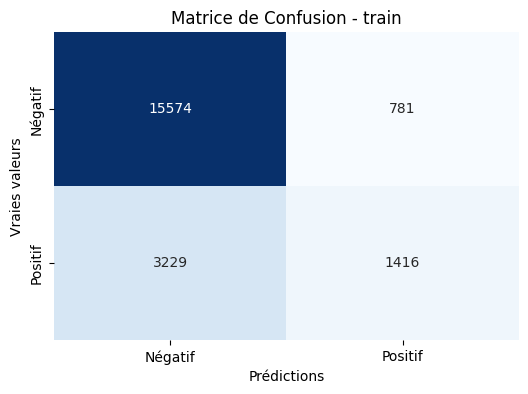

AUC: 0.76


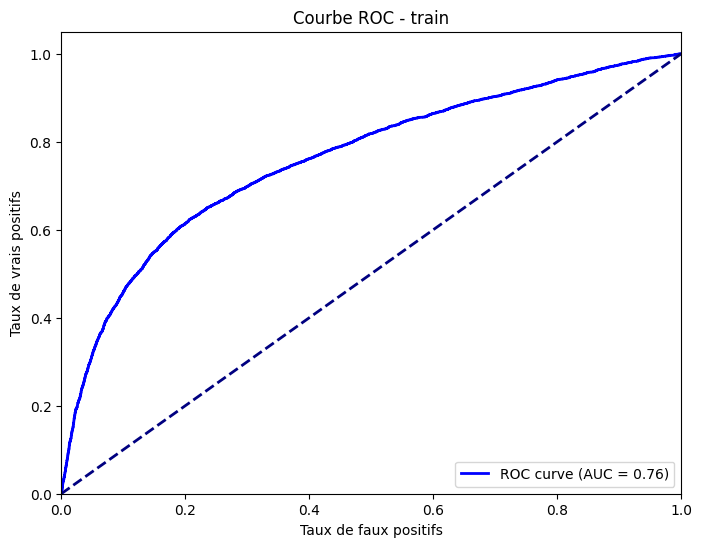

In [26]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_train, y_train_pred, set_name="train")

Métriques sur l'ensemble test:
Accuracy: 0.80, Precision: 0.63, Recall: 0.29, F1: 0.39

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                    6666                     343
Positif (1)                    1419                     572


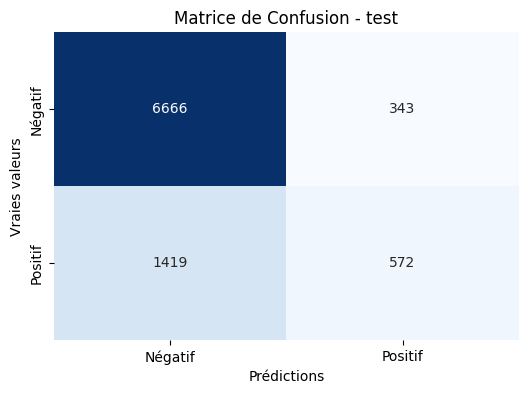

AUC: 0.75


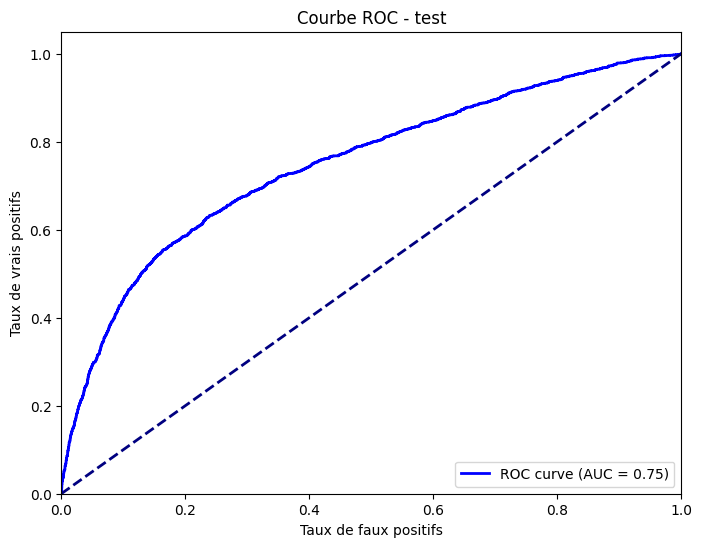

In [27]:
# Évaluer les performances sur l'ensemble de test
evaluer_performance(y_test, y_test_pred, set_name="test")

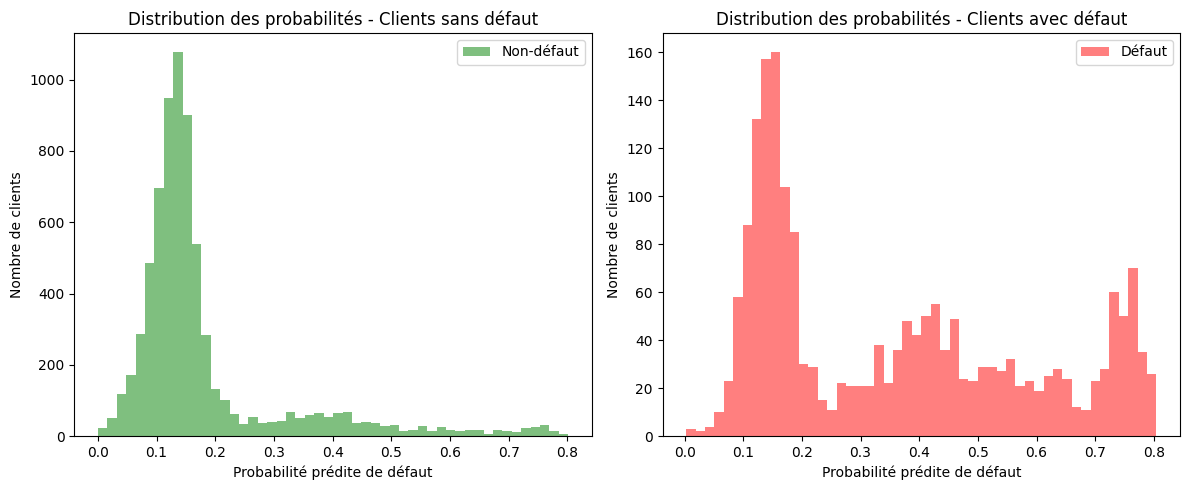

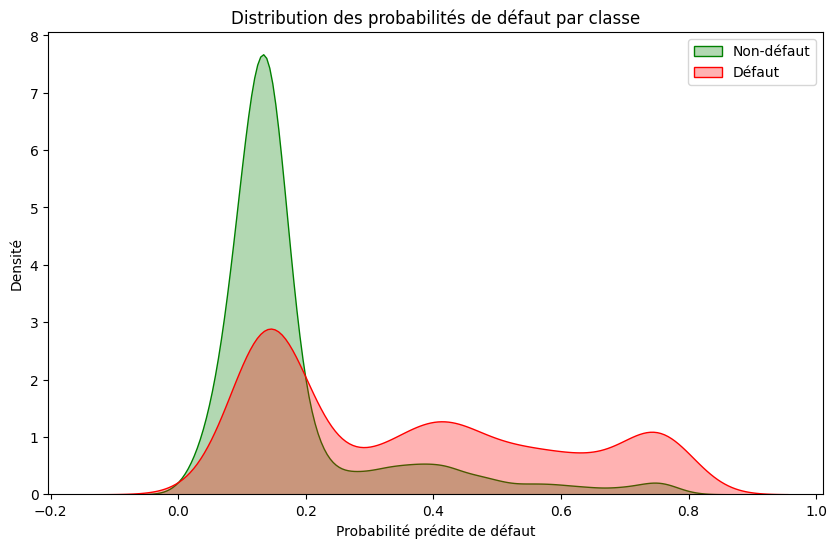

In [28]:
# Créer deux distributions séparées pour les défauts et non-défauts
plt.figure(figsize=(12, 5))

# Distribution des probabilités prédites pour les non-défauts (y=0)
plt.subplot(1, 2, 1)
plt.hist(y_test_pred[y_test == 0], bins=50, alpha=0.5, color='green', label='Non-défaut')
plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Nombre de clients')
plt.title('Distribution des probabilités - Clients sans défaut')
plt.legend()

# Distribution des probabilités prédites pour les défauts (y=1)
plt.subplot(1, 2, 2)
plt.hist(y_test_pred[y_test == 1], bins=50, alpha=0.5, color='red', label='Défaut')
plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Nombre de clients')
plt.title('Distribution des probabilités - Clients avec défaut')
plt.legend()

plt.tight_layout()
plt.show()
# Tracer les courbes de densité de probabilité sur le même graphique
plt.figure(figsize=(10, 6))

# Densité pour les non-défauts (y=0)
sns.kdeplot(data=y_test_pred[y_test == 0], color='green', label='Non-défaut', fill=True, alpha=0.3)

# Densité pour les défauts (y=1)
sns.kdeplot(data=y_test_pred[y_test == 1], color='red', label='Défaut', fill=True, alpha=0.3)

plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Densité')
plt.title('Distribution des probabilités de défaut par classe')
plt.legend()
plt.show()

# Amélioration du modèle

In [29]:
# Séparation des variables explicatives et cible
X = df.drop(columns='default.payment.next.month')
y = df['default.payment.next.month']

In [30]:
len(y)

30000

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def find_optimal_bins(X, y, variable, max_bins=5):
    """
    Trouve le nombre optimal de bins pour discrétiser une variable.
    """
    def calculate_cramer_v(table):
        chi2 = chi2_contingency(table)[0]
        n = table.to_numpy().sum()
        min_dim = min(table.shape) - 1
        return np.sqrt(chi2 / (n * min_dim)) if n > 0 and min_dim > 0 else 0

    results = []

    for n_bins in range(2, max_bins + 1):
        # Calcul des quantiles et suppression des doublons dans les bornes
        boundaries = np.unique(np.percentile(X[variable], np.linspace(0, 100, n_bins + 1)))

        # Si le nombre de bornes uniques est insuffisant, passer à l'itération suivante
        if len(boundaries) < 3:
            continue

        try:
            X_binned = pd.cut(
                X[variable],
                bins=boundaries,
                labels=False,
                include_lowest=True,  # Assure l'inclusion de la valeur minimale
                duplicates='drop'
            )
            contingency = pd.crosstab(X_binned, y)
            cramer = calculate_cramer_v(contingency)

            results.append({
                'n_bins': len(boundaries) - 1,
                'cramer_v': cramer,
                'boundaries': boundaries
            })
        except Exception as e:
            print(f"Erreur avec {n_bins} bins pour {variable}: {e}")
            continue

    if not results:
        # Si aucune discrétisation n'a fonctionné, retourner la variable d'origine
        return X[variable]

    # Sélection du meilleur nombre de bins selon le maximum de Cramér's V
    best_bins = max(results, key=lambda x: x['cramer_v'])

    # Discrétisation avec le meilleur nombre de bins
    X_discretized = pd.cut(
        X[variable],
        bins=best_bins['boundaries'],
        include_lowest=True,  # Assure l'inclusion de la valeur minimale
        duplicates='drop'
    )

    return X_discretized

# Liste des variables quantitatives
quant_vars = ['LIMIT_BAL', 'AGE',
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


# Liste des variables qualitatives (toutes les colonnes sauf les quantitatives)
qual_vars = [col for col in X.columns if col not in quant_vars]

# Création du nouveau DataFrame
X_transformed = X[qual_vars].copy()

# Discrétisation de chaque variable quantitative
for var in quant_vars:
    X_transformed[f'{var}_disc'] = find_optimal_bins(X, y, var, max_bins=5)

# Ajout de la variable cible
X_transformed['default'] = y

print("Aperçu du DataFrame transformé:")
print(X_transformed.head())


Aperçu du DataFrame transformé:
   ID SEX EDUCATION MARRIAGE             PAY_0             PAY_2  \
0   1   2         2        1            Retard            Retard   
1   2   2         2        2  Paiement à temps            Retard   
2   3   2         2        2  Paiement à temps  Paiement à temps   
3   4   2         2        1  Paiement à temps  Paiement à temps   
4   5   1         2        1  Paiement à temps  Paiement à temps   

              PAY_3             PAY_4             PAY_5             PAY_6  \
0  Paiement à temps  Paiement à temps  Paiement à temps  Paiement à temps   
1  Paiement à temps  Paiement à temps  Paiement à temps            Retard   
2  Paiement à temps  Paiement à temps  Paiement à temps  Paiement à temps   
3  Paiement à temps  Paiement à temps  Paiement à temps  Paiement à temps   
4  Paiement à temps  Paiement à temps  Paiement à temps  Paiement à temps   

   ...        BILL_AMT4_disc       BILL_AMT5_disc        BILL_AMT6_disc  \
0  ...  (-170000.001,

# Calcul des IV pour chaque variable
# Information Value (IV) - Un indicateur puissant pour la sélection de variables

L'Information Value (IV) est une mesure statistique très utilisée dans le domaine du crédit scoring et de l'analyse prédictive pour évaluer le pouvoir prédictif des variables explicatives par rapport à une variable cible binaire.

Calcul des IV sur les données discrétisées...


c:\Program Files\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



Information Values pour chaque variable:
ID: inf
PAY_0: 0.6842
PAY_2: 0.5409
PAY_3: 0.4086
PAY_4: 0.3543
PAY_5: 0.3283
PAY_6: 0.2816
LIMIT_BAL_disc: 0.1601
PAY_AMT1_disc: 0.1548
PAY_AMT2_disc: 0.1395
PAY_AMT3_disc: 0.1168
PAY_AMT4_disc: 0.0940
PAY_AMT6_disc: 0.0899
PAY_AMT5_disc: 0.0760
EDUCATION: 0.0373
BILL_AMT6_disc: 0.0134
AGE_disc: 0.0126
BILL_AMT5_disc: 0.0125
BILL_AMT2_disc: 0.0103
BILL_AMT4_disc: 0.0102
BILL_AMT1_disc: 0.0102
BILL_AMT3_disc: 0.0095
SEX: 0.0092
MARRIAGE: 0.0054


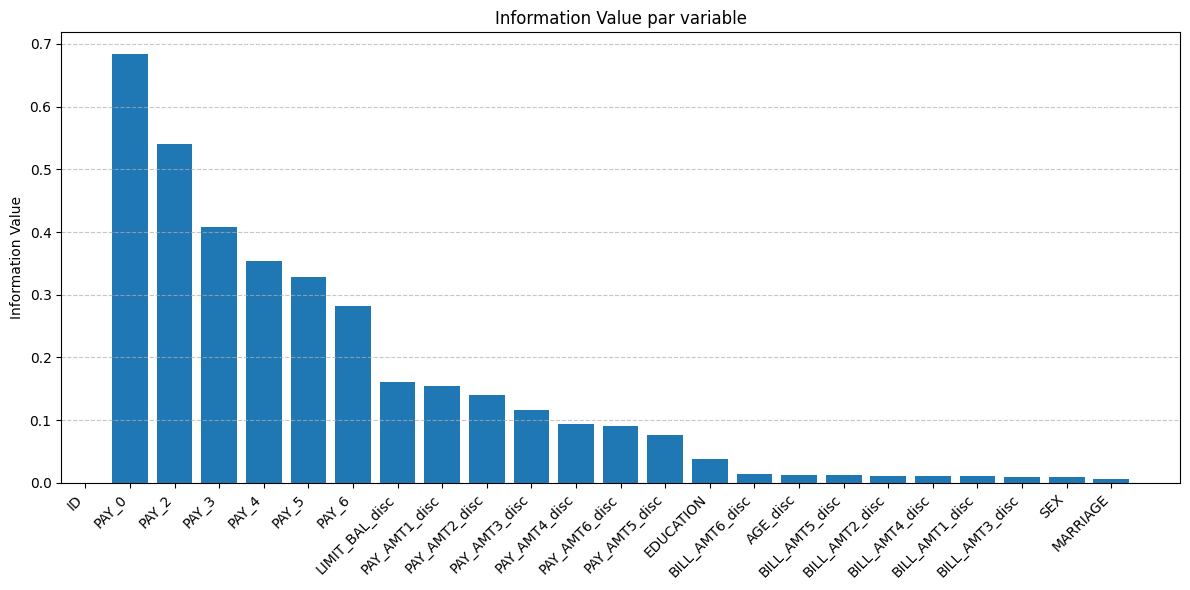


Weight of Evidence pour les variables les plus prédictives:

ID:
  1: -inf
  2: -inf
  3: inf
  4: inf
  5: inf
  6: inf
  7: inf
  8: inf
  9: inf
  10: inf
  11: inf
  12: inf
  13: inf
  14: -inf
  15: inf
  16: inf
  17: -inf
  18: inf
  19: inf
  20: inf
  21: inf
  22: -inf
  23: -inf
  24: -inf
  25: inf
  26: inf
  27: -inf
  28: inf
  29: inf
  30: inf
  31: inf
  32: -inf
  33: inf
  34: inf
  35: inf
  36: inf
  37: inf
  38: inf
  39: -inf
  40: inf
  41: inf
  42: inf
  43: inf
  44: inf
  45: inf
  46: -inf
  47: -inf
  48: -inf
  49: inf
  50: inf
  51: -inf
  52: inf
  53: inf
  54: inf
  55: inf
  56: inf
  57: inf
  58: inf
  59: inf
  60: inf
  61: -inf
  62: inf
  63: -inf
  64: -inf
  65: inf
  66: -inf
  67: -inf
  68: inf
  69: inf
  70: inf
  71: inf
  72: -inf
  73: inf
  74: inf
  75: inf
  76: inf
  77: inf
  78: inf
  79: -inf
  80: -inf
  81: inf
  82: inf
  83: -inf
  84: inf
  85: inf
  86: inf
  87: -inf
  88: inf
  89: inf
  90: inf
  91: -inf
  92: in

In [32]:
def calculate_iv_for_feature(df, feature, target='default'):
    """
    Calcule l'Information Value (IV) pour une variable.

    Args:
        df: DataFrame contenant les données
        feature: Nom de la variable à analyser
        target: Nom de la variable cible

    Returns:
        float: Information Value
        dict: Détails WoE par catégorie
    """
    # Création d'une table de contingence
    contingency = pd.crosstab(df[feature], df[target])

    # Calcul des proportions pour chaque classe
    prop_good = contingency[0] / contingency[0].sum()
    prop_bad = contingency[1] / contingency[1].sum()

    # Calcul de WoE et IV
    woe = np.log(prop_good / prop_bad)
    iv = ((prop_good - prop_bad) * woe).sum()

    # Création d'un dictionnaire des WoE par catégorie
    woe_dict = woe.to_dict()

    return iv, woe_dict

def calculate_iv_all_features(df, target='default'):
    """
    Calcule l'IV pour toutes les variables du DataFrame.

    Args:
        df: DataFrame contenant les données
        target: Nom de la variable cible

    Returns:
        dict: IV scores pour chaque variable
        dict: WoE dictionnaires pour chaque variable
    """
    iv_scores = {}
    woe_dicts = {}

    for column in df.columns:
        if column != target:
            try:
                iv, woe_dict = calculate_iv_for_feature(df, column, target)
                iv_scores[column] = iv
                woe_dicts[column] = woe_dict
            except Exception as e:
                print(f"Erreur pour {column}: {e}")
                continue

    return iv_scores, woe_dicts

# Application sur les données discrétisées
print("Calcul des IV sur les données discrétisées...")
iv_scores, woe_dicts = calculate_iv_all_features(X_transformed)

# Tri des variables par IV décroissant
iv_scores = dict(sorted(iv_scores.items(), key=lambda x: x[1], reverse=True))

# Affichage des résultats
print("\nInformation Values pour chaque variable:")
for var, iv in iv_scores.items():
    print(f"{var}: {iv:.4f}")

# Création d'un graphique des IV
plt.figure(figsize=(12, 6))
plt.bar(iv_scores.keys(), iv_scores.values())
plt.xticks(rotation=45, ha='right')
plt.title('Information Value par variable')
plt.ylabel('Information Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Affichage des WoE pour les variables les plus prédictives
top_features = list(iv_scores.keys())[:5]  # Top 5 variables
print("\nWeight of Evidence pour les variables les plus prédictives:")
for feature in top_features:
    print(f"\n{feature}:")
    for category, woe in woe_dicts[feature].items():
        print(f"  {category}: {woe:.4f}")



## Comment interpréter l'IV ?

| Valeur IV | Pouvoir prédictif | Recommandation |
|-----------|-------------------|----------------|
| < 0.02 | Très faible | Ne pas utiliser la variable |
| 0.02 - 0.1 | Faible | Pouvoir prédictif limité |
| 0.1 - 0.3 | Moyen | Variable utile |
| 0.3 - 0.5 | Fort | Variable très prédictive |
| > 0.5 | Très fort | Excellent prédicteur mais attention au surapprentissage |

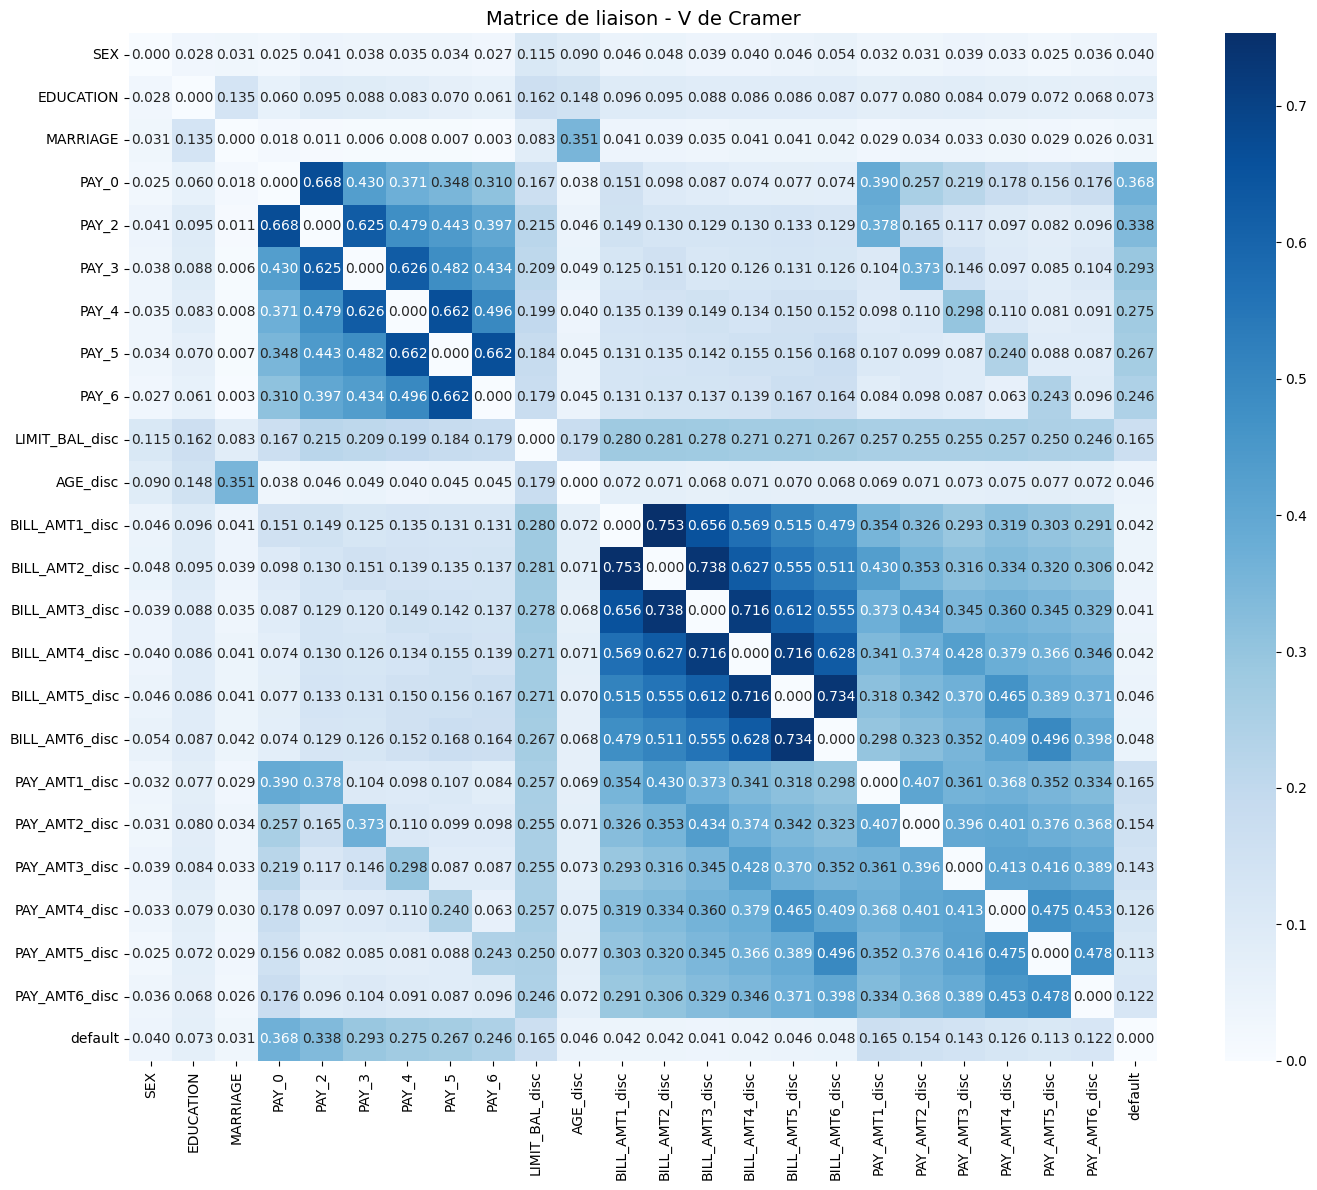


Paires de variables fortement liées (V de Cramer > 0.6):
--------------------------------------------------
PAY_0 <-> PAY_2: 0.668
PAY_2 <-> PAY_3: 0.625
PAY_3 <-> PAY_4: 0.626
PAY_4 <-> PAY_5: 0.662
PAY_5 <-> PAY_6: 0.662
BILL_AMT1_disc <-> BILL_AMT2_disc: 0.753
BILL_AMT1_disc <-> BILL_AMT3_disc: 0.656
BILL_AMT2_disc <-> BILL_AMT3_disc: 0.738
BILL_AMT2_disc <-> BILL_AMT4_disc: 0.627
BILL_AMT3_disc <-> BILL_AMT4_disc: 0.716
BILL_AMT3_disc <-> BILL_AMT5_disc: 0.612
BILL_AMT4_disc <-> BILL_AMT5_disc: 0.716
BILL_AMT4_disc <-> BILL_AMT6_disc: 0.628
BILL_AMT5_disc <-> BILL_AMT6_disc: 0.734


In [33]:
def calculate_cramers_v_matrix(df):
    """
    Calcule la matrice de liaison entre variables qualitatives avec le V de Cramer
    """
    # Identification des variables qualitatives (type object ou catégorie)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Création d'une matrice vide
    n = len(categorical_cols)
    cramer_matrix = np.zeros((n, n))

    # Calcul du V de Cramer pour chaque paire de variables
    for i in range(n):
        for j in range(n):
            if i != j:
                # Création de la table de contingence
                confusion_matrix = pd.crosstab(df[categorical_cols[i]],
                                            df[categorical_cols[j]])

                # Calcul du chi2
                chi2, _ = chi2_contingency(confusion_matrix)[0:2]

                # Calcul du V de Cramer
                n_observations = confusion_matrix.sum().sum()
                min_dim = min(confusion_matrix.shape) - 1
                cramer_v = np.sqrt(chi2 / (n_observations * min_dim))

                cramer_matrix[i,j] = cramer_v

    # Création du DataFrame pour la visualisation
    cramer_df = pd.DataFrame(cramer_matrix,
                           index=categorical_cols,
                           columns=categorical_cols)

    return cramer_df

# Calcul de la matrice de liaison
cramer_matrix = calculate_cramers_v_matrix(X_transformed)

# Création de la heatmap avec une taille plus grande
plt.figure(figsize=(15, 12))
sns.heatmap(cramer_matrix,
            annot=True,
            cmap='Blues',
            fmt='.3f',
            square=True,
            annot_kws={'size': 10})
plt.title("Matrice de liaison - V de Cramer", fontsize=14)
plt.tight_layout()
plt.show()

# Identification des paires de variables fortement liées (V de Cramer > 0.6)
print("\nPaires de variables fortement liées (V de Cramer > 0.6):")
print("-" * 50)
for i in range(len(cramer_matrix.index)):
    for j in range(i+1, len(cramer_matrix.columns)):
        if cramer_matrix.iloc[i,j] > 0.6:
            print(f"{cramer_matrix.index[i]} <-> {cramer_matrix.columns[j]}: {cramer_matrix.iloc[i,j]:.3f}")



In [34]:
# Sélection des variables pour le modèle final

variables_selectionnees = [
    'SEX',            # Genre
    'EDUCATION',      # Niveau d'éducation
    'MARRIAGE',       # Statut marital
    'PAY_0',         # Historique de paiement du mois actuel
    'LIMIT_BAL_disc', # Limite de crédit (version discrétisée)
    'BILL_AMT1_disc', # Montant de la facture du mois actuel (version discrétisée)
    'PAY_AMT1_disc',  # Montant payé le mois dernier (version discrétisée)
    'AGE_disc'        # Age du client (version discrétisée)
]

# Création du DataFrame avec les variables sélectionnées
X_final = X_transformed[variables_selectionnees]


In [35]:
# Préparation des données pour la modélisation finale
# Création des variables indicatrices pour toutes les variables qualitatives
X_final_encoded = pd.get_dummies(X_final, drop_first=True)


In [36]:
len(X_final_encoded)

30000

In [37]:
# Import des bibliothèques nécessaires
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Ajout d'une constante pour statsmodels
X_final_encoded = sm.add_constant(X_final_encoded)
len(X_final_encoded)

30000

In [39]:
# Pour y, si ce n'est pas déjà numérique :
y_numeric = pd.to_numeric(y, errors='coerce')

In [40]:
# Conversion explicite de toutes les colonnes en int
for col in X_final_encoded.columns:
    X_final_encoded[col] = X_final_encoded[col].astype(int)

# Conversion de y en int
y = y.astype(int)


In [41]:
# Division en ensembles d'entraînement et de test avec stratification
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final_encoded,
    y_numeric,
    test_size=0.2,
    random_state=42,
    stratify=y_numeric
)

In [43]:
# Création et entraînement du modèle avec statsmodels
model_final = sm.Logit(y_train_final, X_train_final)
results = model_final.fit()

Optimization terminated successfully.
         Current function value: 0.455842
         Iterations 7


In [44]:
# Affichage du résumé statistique
print("\nRésumé statistique du modèle:")
print(results.summary())

# Création d'un DataFrame avec les coefficients et statistiques
coef_summary = pd.DataFrame({
    'Coefficient': results.params,
    'Std Error': results.bse,
    'z-value': results.tvalues,
    'P-value': results.pvalues,
    'CI 2.5%': results.conf_int()[0],
    'CI 97.5%': results.conf_int()[1]
})
print("\nTableau détaillé des coefficients:")


Résumé statistique du modèle:
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23977
Method:                                   MLE   Df Model:                           22
Date:                        Thu, 18 Dec 2025   Pseudo R-squ.:                  0.1374
Time:                                23:22:37   Log-Likelihood:                -10940.
converged:                               True   LL-Null:                       -12682.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.3061      0.087    -

In [45]:
print(coef_summary)

                                      Coefficient  Std Error    z-value  \
const                                   -1.306145   0.086988 -15.015223   
SEX_2                                   -0.144700   0.035078  -4.125098   
EDUCATION_2                              0.016865   0.040472   0.416709   
EDUCATION_3                             -0.081320   0.054233  -1.499469   
EDUCATION_Autres                        -1.174464   0.206068  -5.699389   
MARRIAGE_2                              -0.158830   0.040065  -3.964301   
MARRIAGE_Autres                         -0.112974   0.146890  -0.769102   
PAY_0_Retard                             1.746209   0.039146  44.607192   
LIMIT_BAL_disc_(50000.0, 140000.0]      -0.245119   0.048104  -5.095624   
LIMIT_BAL_disc_(140000.0, 240000.0]     -0.600215   0.054969 -10.919116   
LIMIT_BAL_disc_(240000.0, 1000000.0]    -0.856069   0.060902 -14.056559   
BILL_AMT1_disc_(1892.8, 13469.2]         0.219633   0.056471   3.889332   
BILL_AMT1_disc_(13469.2, 

In [48]:
import pandas as pd
# Calcul du VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculer le VIF pour chaque variable
vif = pd.DataFrame()
vif["Variable"] = X_train_final.columns
vif["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]

# Afficher le DataFrame VIF
vif

,Variable,VIF
0,const,27.305796
1,SEX_2,1.038885
2,EDUCATION_2,1.376440
3,EDUCATION_3,1.418327
4,EDUCATION_Autres,1.036722
5,MARRIAGE_2,1.376421
6,MARRIAGE_Autres,1.025058
7,PAY_0_Retard,1.240268
8,"LIMIT_BAL_disc_(50000.0, 140000.0]",1.742041
9,"LIMIT_BAL_disc_(140000.0, 240000.0]",2.050451


On observe qu'on n'a plus de multicolinarité VIF<5>


Évaluation sur l'ensemble d'entraînement:
Métriques sur l'ensemble train:
Accuracy: 0.80, Precision: 0.58, Recall: 0.34, F1: 0.42

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                   17374                    1317
Positif (1)                    3526                    1783


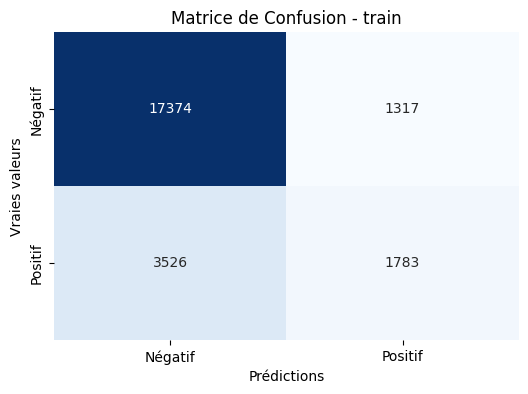

AUC: 0.74


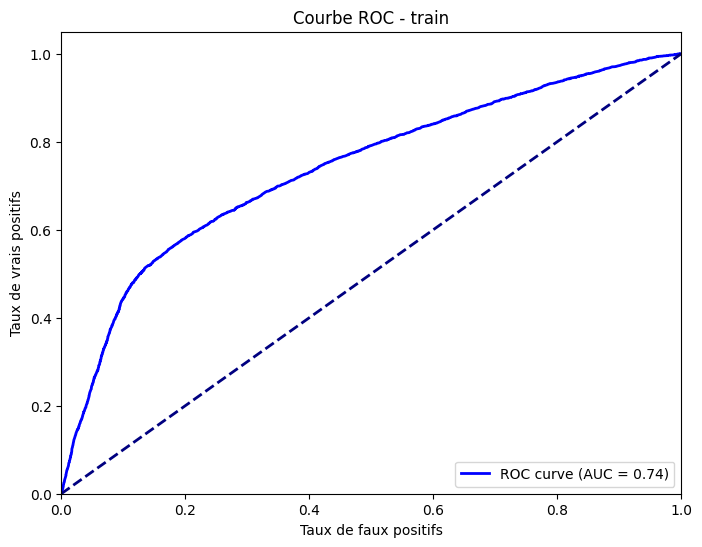


Évaluation sur l'ensemble de test:
Métriques sur l'ensemble test:
Accuracy: 0.79, Precision: 0.53, Recall: 0.31, F1: 0.39

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                    4308                     365
Positif (1)                     918                     409


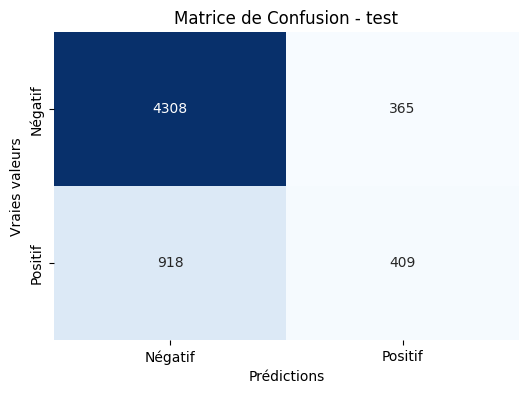

AUC: 0.72


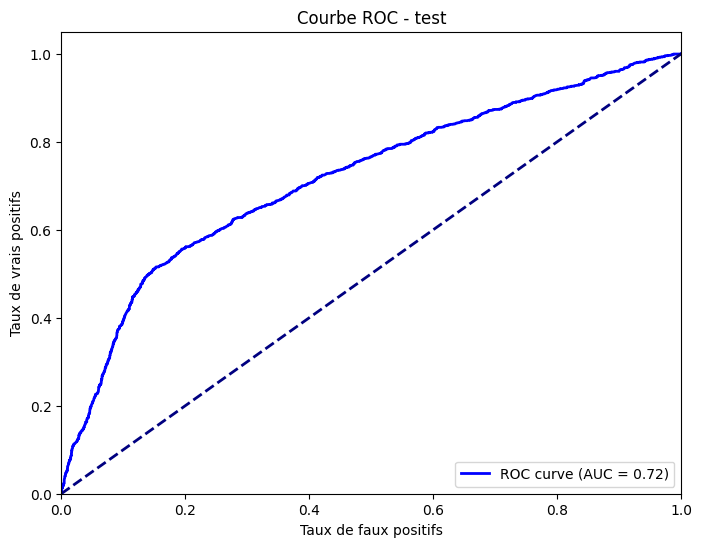

In [46]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred_proba = results.predict(X_train_final)
print("\nÉvaluation sur l'ensemble d'entraînement:")
evaluer_performance(y_train_final, y_train_pred_proba, set_name="train")

# Prédictions sur l'ensemble de test
y_test_pred_proba = results.predict(X_test_final)
print("\nÉvaluation sur l'ensemble de test:")
evaluer_performance(y_test_final, y_test_pred_proba, set_name="test")

Même en supprimant beaucoup de variables, l'AUC n'a pas trop bougé, donc le modèle est performant. 

Optimization terminated successfully.
         Current function value: 0.455842
         Iterations 7


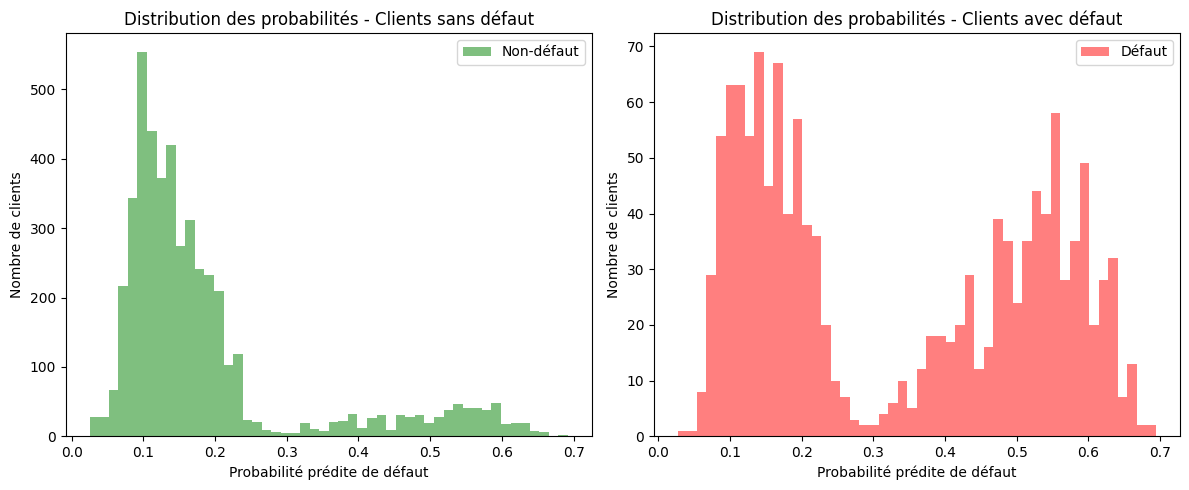

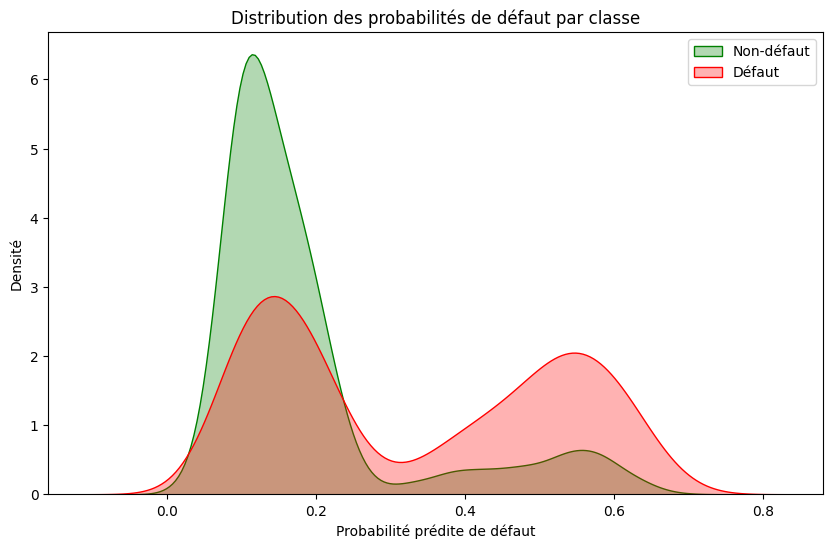

In [49]:
# Création et entraînement du modèle avec statsmodels
model_final = sm.Logit(y_train_final, X_train_final)
results = model_final.fit()



# Distribution des probabilités prédites
plt.figure(figsize=(12, 5))

# Distribution pour les non-défauts (y=0)
plt.subplot(1, 2, 1)
plt.hist(y_test_pred_proba[y_test_final == 0], bins=50, alpha=0.5, color='green', label='Non-défaut')
plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Nombre de clients')
plt.title('Distribution des probabilités - Clients sans défaut')
plt.legend()

# Distribution pour les défauts (y=1)
plt.subplot(1, 2, 2)
plt.hist(y_test_pred_proba[y_test_final == 1], bins=50, alpha=0.5, color='red', label='Défaut')
plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Nombre de clients')
plt.title('Distribution des probabilités - Clients avec défaut')
plt.legend()

plt.tight_layout()
plt.show()

# Courbes de densité
plt.figure(figsize=(10, 6))
sns.kdeplot(data=y_test_pred_proba[y_test_final == 0], color='green', label='Non-défaut', fill=True, alpha=0.3)
sns.kdeplot(data=y_test_pred_proba[y_test_final == 1], color='red', label='Défaut', fill=True, alpha=0.3)
plt.xlabel('Probabilité prédite de défaut')
plt.ylabel('Densité')
plt.title('Distribution des probabilités de défaut par classe')
plt.legend()
plt.show()

En terme de séparation, le pouvoir discriminant a baissé. 

# Création de la grille de scoring





# Le calcul de la grille de score se fait selon les étapes suivantes :
1. Pour chaque variable catégorielle :
   - On identifie le coefficient minimum et maximum parmi ses modalités
 - Le poids total est la différence entre le max et le min
- Pour chaque modalité, on calcule : 100 * (coef - coef_min) / poids

2. Le score final d'un client est la somme des points de ses modalités

Cette méthode permet de :
- Standardiser les scores entre 0 et 100 pour chaque variable
- Conserver les proportions relatives entre les modalités
- Obtenir un score global facilement interprétable


In [50]:
# Récupération des coefficients du modèle
coef_df = pd.DataFrame({
    'Variable': X_train_final.columns,
    'Coefficient': results.params
})
# Récupération des variables uniques (avant le premier _)
unique_base_vars = sorted(list(set([var.rsplit('_', 1)[0] for var in coef_df['Variable']])))
unique_base_vars

# Recalcul des scores avec les vraies variables de base
scores = []
for variable in unique_base_vars:

    # Filtrer les coefficients pour cette variable de base
    var_coefs = coef_df[coef_df['Variable'].str.startswith(variable)]


    if len(var_coefs) > 0:
        # Calculer min, max et poids
        coef_min = var_coefs['Coefficient'].min()
        coef_max = var_coefs['Coefficient'].max()
        poids = coef_max - coef_min

        # Calculer les points pour chaque modalité
        for idx, row in var_coefs.iterrows():
            points = 100 * (row['Coefficient'] - coef_min) / poids if poids != 0 else 0
            scores.append({
                'Variable': variable,
                'Modalité': row['Variable'],
                'Points': round(points, 2)
            })

# Création du tableau des scores
score_table = pd.DataFrame(scores)
print("\nGrille de scoring:")
print(score_table)


Grille de scoring:
          Variable                              Modalité  Points
0         AGE_disc                 AGE_disc_(27.0, 31.0]    0.00
1         AGE_disc                 AGE_disc_(31.0, 37.0]   33.24
2         AGE_disc                 AGE_disc_(37.0, 43.0]   54.79
3         AGE_disc                 AGE_disc_(43.0, 79.0]  100.00
4   BILL_AMT1_disc      BILL_AMT1_disc_(1892.8, 13469.2]   58.88
5   BILL_AMT1_disc     BILL_AMT1_disc_(13469.2, 37045.2]   13.91
6   BILL_AMT1_disc     BILL_AMT1_disc_(37045.2, 83421.2]    0.00
7   BILL_AMT1_disc    BILL_AMT1_disc_(83421.2, 964511.0]  100.00
8        EDUCATION                           EDUCATION_2  100.00
9        EDUCATION                           EDUCATION_3   91.76
10       EDUCATION                      EDUCATION_Autres    0.00
11  LIMIT_BAL_disc    LIMIT_BAL_disc_(50000.0, 140000.0]  100.00
12  LIMIT_BAL_disc   LIMIT_BAL_disc_(140000.0, 240000.0]   41.88
13  LIMIT_BAL_disc  LIMIT_BAL_disc_(240000.0, 1000000.0]    0.00
14   

In [51]:
unique_base_vars

['AGE_disc',
 'BILL_AMT1_disc',
 'EDUCATION',
 'LIMIT_BAL_disc',
 'MARRIAGE',
 'PAY_0',
 'PAY_AMT1_disc',
 'SEX',
 'const']

In [52]:
# Récupération des variables uniques (avant le dernier _)
unique_base_vars = sorted(list(set([var.rsplit('_', 1)[0] for var in coef_df['Variable']])))

# Recalcul des scores avec les vraies variables de base
scores = []
for variable in unique_base_vars:

    # Filtrer les coefficients pour cette variable de base
    var_coefs = coef_df[coef_df['Variable'].str.startswith(variable + '_')]

    if len(var_coefs) > 0:
        # Calculer min, max et poids
        coef_min = var_coefs['Coefficient'].min()
        coef_max = var_coefs['Coefficient'].max()
        poids = coef_max - coef_min

        # Calculer les points pour chaque modalité
        for idx, row in var_coefs.iterrows():
            points = 100 * (row['Coefficient'] - coef_min) / poids if poids != 0 else 0
            scores.append({
                'Variable': variable,
                'Modalité': row['Variable'],
                'Points': round(points, 2)
            })

# Création du tableau des scores
score_table = pd.DataFrame(scores)
print("\nGrille de scoring:")
print(score_table)


Grille de scoring:
          Variable                              Modalité  Points
0         AGE_disc                 AGE_disc_(27.0, 31.0]    0.00
1         AGE_disc                 AGE_disc_(31.0, 37.0]   33.24
2         AGE_disc                 AGE_disc_(37.0, 43.0]   54.79
3         AGE_disc                 AGE_disc_(43.0, 79.0]  100.00
4   BILL_AMT1_disc      BILL_AMT1_disc_(1892.8, 13469.2]   58.88
5   BILL_AMT1_disc     BILL_AMT1_disc_(13469.2, 37045.2]   13.91
6   BILL_AMT1_disc     BILL_AMT1_disc_(37045.2, 83421.2]    0.00
7   BILL_AMT1_disc    BILL_AMT1_disc_(83421.2, 964511.0]  100.00
8        EDUCATION                           EDUCATION_2  100.00
9        EDUCATION                           EDUCATION_3   91.76
10       EDUCATION                      EDUCATION_Autres    0.00
11  LIMIT_BAL_disc    LIMIT_BAL_disc_(50000.0, 140000.0]  100.00
12  LIMIT_BAL_disc   LIMIT_BAL_disc_(140000.0, 240000.0]   41.88
13  LIMIT_BAL_disc  LIMIT_BAL_disc_(240000.0, 1000000.0]    0.00
14   

In [53]:
# Calcul des statistiques par variable
stats_par_variable = {}

for variable in score_table['Variable'].unique():
    points_variable = score_table[score_table['Variable'] == variable]['Points']

    stats_par_variable[variable] = {
        'Minimum': points_variable.min(),
        'Maximum': points_variable.max(),
        'Somme': points_variable.sum()
    }

# Affichage des statistiques
print("\nStatistiques par variable:")
print("-" * 50)
for var, stats in stats_par_variable.items():
    print(f"\nVariable: {var}")
    print(f"Minimum: {stats['Minimum']:.2f}")
    print(f"Maximum: {stats['Maximum']:.2f}")
    print(f"Somme: {stats['Somme']:.2f}")



Statistiques par variable:
--------------------------------------------------

Variable: AGE_disc
Minimum: 0.00
Maximum: 100.00
Somme: 188.03

Variable: BILL_AMT1_disc
Minimum: 0.00
Maximum: 100.00
Somme: 172.79

Variable: EDUCATION
Minimum: 0.00
Maximum: 100.00
Somme: 191.76

Variable: LIMIT_BAL_disc
Minimum: 0.00
Maximum: 100.00
Somme: 141.88

Variable: MARRIAGE
Minimum: 0.00
Maximum: 100.00
Somme: 100.00

Variable: PAY_0
Minimum: 0.00
Maximum: 0.00
Somme: 0.00

Variable: PAY_AMT1_disc
Minimum: 0.00
Maximum: 100.00
Somme: 239.16

Variable: SEX
Minimum: 0.00
Maximum: 0.00
Somme: 0.00


In [54]:
score_table.Points.sum()

1033.6200000000001

In [55]:
# Calcul du score total pour chaque client du jeu de test
X_test_scores = X_test_final.copy()
client_scores = np.zeros(len(X_test_scores))

for index, row in score_table.iterrows():
    modalite = row['Modalité']
    points = row['Points']
    client_scores += X_test_scores[modalite] * points

print("\nStatistiques des scores totaux:")
print(pd.Series(client_scores).describe())



Statistiques des scores totaux:
count    6000.000000
mean      219.020150
std        95.521474
min         0.000000
25%       147.150000
50%       213.910000
75%       291.760000
max       513.910000
Name: AGE_disc_(27.0, 31.0], dtype: float64
